In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.2f}".format

print("Imported modules.")

Imported modules.


In [2]:
dataFrame = pd.read_csv("bodyfat.csv")
dataFrame = dataFrame.reindex(np.random.permutation(dataFrame.index))

#add bmi feature cross
dataFrame['BMI'] = dataFrame['Height'] / dataFrame['Weight']

print("Data set loaded. Num examples: ", len(dataFrame))

trainDF = dataFrame.sample(frac = 0.8)
testDF = dataFrame.drop(trainDF.index)

print("Made training and test sets")

dataFrame

Data set loaded. Num examples:  252
Made training and test sets


,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
53,1.08,6.30,49,152.75,73.50,35.10,93.30,79.60,91.60,52.60,37.60,22.60,38.50,27.40,18.50,0.48
251,1.03,31.90,74,207.50,70.00,40.80,112.40,108.50,107.10,59.30,42.20,24.60,33.70,30.00,20.90,0.34
234,1.04,25.80,60,157.75,67.50,40.40,97.20,93.30,94.00,54.30,35.70,21.00,31.30,28.70,18.30,0.43
57,1.04,28.00,62,201.25,69.50,40.50,111.50,104.20,105.80,61.80,39.80,22.70,37.70,30.90,19.20,0.35
81,1.04,26.80,64,150.25,67.25,38.10,97.10,89.00,96.90,54.80,38.00,22.00,29.90,25.20,17.70,0.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,1.09,5.20,55,142.25,67.25,35.20,92.70,82.80,91.90,54.40,35.20,22.50,29.40,26.80,17.00,0.47
165,1.05,19.20,35,217.00,73.75,40.50,107.50,95.10,104.50,64.80,41.30,25.60,36.40,33.70,19.40,0.34
203,1.09,6.00,44,184.00,74.00,37.90,100.80,89.10,102.60,60.60,39.00,24.00,32.90,29.20,18.40,0.40
198,1.08,6.60,42,167.25,72.75,37.60,94.00,78.00,99.00,57.50,40.00,22.50,30.60,30.00,18.50,0.43


In [3]:
# Keras Input tensors of float values.
inputs = {
    'Density':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Density'),
    'Age':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Age'),
    'Weight':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Weight'),
    'Height':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Height'),
    'BMI':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='BMI'),
    'Neck':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Neck'),
    'Chest':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Chest'),
    'Abdomen':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Abdomen'),
    'Hip':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Hip'),
    'Thigh':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Thigh'),
    'Knee':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Knee'),
    'Ankle':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Ankle'),
    'Biceps':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Biceps'),
    'Forearm':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Forearm'),
    'Wrist':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Wrist')
}

#Normalise
density = tf.keras.layers.Normalization(
    name='normalization_density',
    axis=None)
density.adapt(trainDF['Density'])
density = density(inputs['Density'])

age = tf.keras.layers.Normalization(
    name = 'normalization_age',
    axis=None)
age.adapt(trainDF['Age'])
age = age(inputs.get('Age'))

weight = tf.keras.layers.Normalization(
    name = 'normalization_weight',
    axis=None)
weight.adapt(trainDF['Weight'])
weight = weight(inputs.get('Weight'))

height = tf.keras.layers.Normalization(
    name = 'normalization_height',
    axis=None)
height.adapt(trainDF['Height'])
height = height(inputs.get('Height'))

bmi_boundaries = np.linspace(1.84,12.4, 30+1)

bmi = tf.keras.layers.Normalization(
    name = 'normalization_neck',
    axis=None)
bmi.adapt(trainDF['BMI'])
bmi = bmi(inputs.get('BMI'))

bmi = tf.keras.layers.Discretization(
    bin_boundaries=bmi_boundaries,
    name='discretization_bmi')(bmi)

neck = tf.keras.layers.Normalization(
    name = 'normalization_neck',
    axis=None)
neck.adapt(trainDF['Neck'])
neck = neck(inputs.get('Neck'))

chest = tf.keras.layers.Normalization(
    name = 'normalization_chest',
    axis=None)
chest.adapt(trainDF['Chest'])
chest = chest(inputs.get('Chest'))

abdomen = tf.keras.layers.Normalization(
    name = 'normalization_abdomen',
    axis=None)
abdomen.adapt(trainDF['Abdomen'])
abdomen = abdomen(inputs.get('Abdomen'))

hip = tf.keras.layers.Normalization(
    name = 'normalization_hip',
    axis=None)
hip.adapt(trainDF['Hip'])
hip = hip(inputs.get('Hip'))

thigh = tf.keras.layers.Normalization(
    name = 'normalization_thigh',
    axis=None)
thigh.adapt(trainDF['Thigh'])
thigh = thigh(inputs.get('Thigh'))

knee = tf.keras.layers.Normalization(
    name = 'normalization_knee',
    axis=None)
knee.adapt(trainDF['Knee'])
knee = knee(inputs.get('Knee'))

ankle = tf.keras.layers.Normalization(
    name = 'normalization_ankle',
    axis=None)
ankle.adapt(trainDF['Ankle'])
ankle = ankle(inputs.get('Ankle'))

biceps = tf.keras.layers.Normalization(
    name = 'normalization_biceps',
    axis=None)
biceps.adapt(trainDF['Biceps'])
biceps = biceps(inputs.get('Biceps'))

forearm = tf.keras.layers.Normalization(
    name = 'normalization_forearm',
    axis=None)
forearm.adapt(trainDF['Forearm'])
forearm = forearm(inputs.get('Forearm'))

wrist = tf.keras.layers.Normalization(
    name = 'normalization_wrist',
    axis=None)
wrist.adapt(trainDF['Wrist'])
wrist = wrist(inputs.get('Wrist'))

# Concatenate our inputs into a single tensor.
preprocessing_layers = tf.keras.layers.Concatenate()
preprocessing_layers = preprocessing_layers(list(inputs.values()))

print("Preprocessing layers defined.")

Preprocessing layers defined.


In [4]:
#@title Define the plotting function.

def plot_the_loss_curve(epochs, mse_training, mse_validation):
    """Plot a curve of loss vs. epoch."""

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Mean Squared Error")
    plt.yscale("log")  # Set y-axis scale to logarithmic

    plt.plot(epochs, mse_training, label="Training Loss")
    plt.plot(epochs, mse_validation, label="Validation Loss")

    merged_mse_lists = mse_training.tolist() + mse_validation
    highest_loss = max(merged_mse_lists)
    lowest_loss = min(merged_mse_lists)
    top_of_y_axis = highest_loss * 1.03
    bottom_of_y_axis = lowest_loss * 0.97

    plt.ylim([bottom_of_y_axis, top_of_y_axis])
    plt.legend()
    plt.show()

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


In [5]:
#@title Define functions to create and train a linear regression model
def create_model(my_inputs, my_outputs, my_learning_rate, l2_regularization):
  """Create and compile a simple linear regression model."""
  model = tf.keras.Model(inputs=my_inputs, outputs=my_outputs)

  # Add L2 regularization to all trainable weights in the model.
  regularizer = tf.keras.regularizers.l2(l2_regularization)
  for layer in model.layers:
    for attr in ['kernel_regularizer', 'bias_regularizer']:
      if hasattr(layer, attr):
        setattr(layer, attr, regularizer)

  # Construct the layers into a model that TensorFlow can execute.
  model.compile(optimizer=tf.keras.optimizers.Adam(
      learning_rate=my_learning_rate),
      loss="mean_squared_error",
      metrics=[tf.keras.metrics.MeanSquaredError()])

  return model

# Create Normalization layers
train_bodyfat_normalized = tf.keras.layers.Normalization(axis=None)
train_bodyfat_normalized.adapt(
    np.array(trainDF['BodyFat']))

test_bodyfat_normalized = tf.keras.layers.Normalization(axis=None)
test_bodyfat_normalized.adapt(
    np.array(testDF['BodyFat']))

def train_model(model, dataset, epochs, batch_size, label_name, validation_split=0.1):
  """Feed a dataset into the model in order to train it."""

  # Split the dataset into features and label.
  features = {name:np.array(value) for name, value in dataset.items()}
  label = train_bodyfat_normalized(
      np.array(features.pop(label_name)))
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, validation_split=validation_split)

  # Get details that will be useful for plotting the loss curve.
  epochs = history.epoch
  hist = pd.DataFrame(history.history)
  mse = hist["mean_squared_error"]

  return epochs, mse, history.history

print("Defined the create_model and train_model functions.")

Defined the create_model and train_model functions.


In [6]:
#@title Define linear regression model outputs
def get_outputs_linear_regression():
  # Create the Dense output layer.
  dense_output = tf.keras.layers.Dense(units=1, input_shape=(1,),
                              name='dense_output')(preprocessing_layers)

  # Define an output dictionary we'll send to the model constructor.
  outputs = {
    'dense_output': dense_output
  }
  return outputs

In [7]:
def get_outputs_dnn():
  # Create a Dense layer with 20 nodes.
  dense_output = tf.keras.layers.Dense(units=13, input_shape=(1,),
                              activation='relu',
                              name='hidden_dense_layer_1')(preprocessing_layers)
  # Create a Dense layer with 12 nodes.
  dense_output = tf.keras.layers.Dense(units=10, input_shape=(1,),
                              activation='relu',
                              name='hidden_dense_layer_2')(dense_output)
  # Create a Dense layer with 12 nodes.
  dense_output = tf.keras.layers.Dense(units=7, input_shape=(1,),
                              activation='relu',
                              name='hidden_dense_layer_3')(dense_output)
  # Create a Dense layer with 12 nodes.
  dense_output = tf.keras.layers.Dense(units=5, input_shape=(1,),
                              activation='relu',
                              name='hidden_dense_layer_4')(dense_output)
  # Create a Dense layer with 12 nodes.
  dense_output = tf.keras.layers.Dense(units=3, input_shape=(1,),
                              activation='relu',
                              name='hidden_dense_layer_5')(dense_output)
  # Create the Dense output layer.
  dense_output = tf.keras.layers.Dense(units=1, input_shape=(1,),
                              name='dense_output')(dense_output)

  # Define an output dictionary we'll send to the model constructor.
  outputs = {
    'dense_output': dense_output
  }

  return outputs

Epoch 1/400
10/10 [==============================] - 2s 24ms/step - loss: 16.1964 - mean_squared_error: 16.1964 - val_loss: 12.3916 - val_mean_squared_error: 12.3916
Epoch 2/400
10/10 [==============================] - 0s 6ms/step - loss: 10.0658 - mean_squared_error: 10.0658 - val_loss: 7.1617 - val_mean_squared_error: 7.1617
Epoch 3/400
10/10 [==============================] - 0s 6ms/step - loss: 5.8742 - mean_squared_error: 5.8742 - val_loss: 3.8945 - val_mean_squared_error: 3.8945
Epoch 4/400
10/10 [==============================] - 0s 6ms/step - loss: 3.4241 - mean_squared_error: 3.4241 - val_loss: 1.9758 - val_mean_squared_error: 1.9758
Epoch 5/400
10/10 [==============================] - 0s 6ms/step - loss: 2.1197 - mean_squared_error: 2.1197 - val_loss: 1.1817 - val_mean_squared_error: 1.1817
Epoch 6/400
10/10 [==============================] - 0s 6ms/step - loss: 1.6676 - mean_squared_error: 1.6676 - val_loss: 0.8753 - val_mean_squared_error: 0.8753
Epoch 7/400
10/10 [========

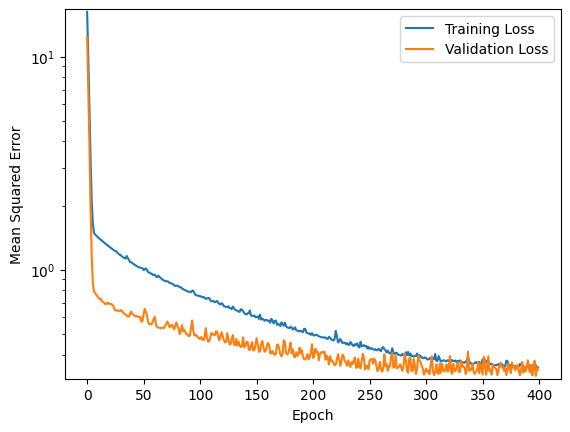

Feature: Density, First Weight: 0.026306141167879105
Feature: Age, First Weight: -0.2987368404865265
Feature: Weight, First Weight: 0.3097221255302429
Feature: Height, First Weight: -0.11726851016283035
Feature: BMI, First Weight: -0.16121713817119598
Feature: Neck, First Weight: 0.1249268427491188
Feature: Chest, First Weight: 0.1603347361087799
Feature: Abdomen, First Weight: 0.38021066784858704
Feature: Hip, First Weight: -0.3763009309768677
Feature: Thigh, First Weight: 0.24889186024665833
Feature: Knee, First Weight: 0.2590871751308441
Feature: Ankle, First Weight: -0.11499162018299103
Feature: Biceps, First Weight: -0.4510895013809204
Feature: Forearm, First Weight: 0.313999742269516
Feature: Wrist, First Weight: -0.009911654517054558

 Evaluate the new model against the test set:
3/3 [==============================] - 0s 2ms/step - loss: 0.5521 - mean_squared_error: 0.5521


{'loss': 0.5521214008331299, 'mean_squared_error': 0.5521214008331299}

In [15]:
# The following variables are the hyperparameters.
learning_rate = 0.00005
epochs = 400
batch_size = 20
l2_regularization = 0.03

# Specify the label
label_name = "BodyFat"

# Split the original training set into a reduced training set and a
# validation set.
validation_split = 0.1

dnn_outputs = get_outputs_dnn()

# Establish the model's topography.
my_model = create_model(
    inputs,
    dnn_outputs,
    learning_rate, l2_regularization)

# Train the model on the normalized training set. We're passing the entire
# normalized training set, but the model will only use the features
# defined in our inputs.
epochs, mse, history = train_model(my_model, trainDF, epochs,
                                   batch_size, label_name, validation_split)
plot_the_loss_curve(epochs, mse, history["val_mean_squared_error"])

# After building a model against the training set, test that model
# against the test set.
test_features = {name:np.array(value) for name, value in testDF.items()}
test_label = test_bodyfat_normalized(np.array(test_features.pop(label_name))) # isolate the label

input_layer = my_model.layers[16]
weights, biases = input_layer.get_weights()

for feature_name, weight in zip(inputs, weights):
    first_weight = weight[0]
    print(f"Feature: {feature_name}, First Weight: {first_weight}")


print("\n Evaluate the new model against the test set:")
my_model.evaluate(x = test_features, y = test_label, batch_size=batch_size, return_dict=True)


In [16]:
# Create an empty DataFrame to store the results
result_table = pd.DataFrame(columns=['Row', 'Predicted Body Fat', 'Correct Body Fat', 'Difference (%)'])

# Get the mean and variance from the normalization layer
mean = train_bodyfat_normalized.mean.numpy()
variance = train_bodyfat_normalized.variance.numpy()

# Get the minimum and maximum values of the original body fat data
min_value = trainDF['BodyFat'].min()
max_value = trainDF['BodyFat'].max()

# Iterate over the rows of the test dataframe
for index, row in testDF.iterrows():
    test_features = {name: np.array([value]) for name, value in row.items()}

    # Get the correct label for the current row
    correct_label = np.array([row[label_name]])
    correct_label_normalized = (correct_label - mean) / np.sqrt(variance)

    # Make predictions using the model
    predictions = my_model.predict(test_features, verbose=0)

    predicted_bodyfat_normalized = predictions['dense_output'][0][0]
    predicted_bodyfat = (predicted_bodyfat_normalized * np.sqrt(variance)) + mean
    predicted_bodyfat = np.round(predicted_bodyfat, decimals=1)

    actual_bodyfat = (correct_label_normalized * np.sqrt(variance)) + mean
    difference = np.round(predicted_bodyfat - actual_bodyfat, 1)
    row_data = pd.DataFrame({'Row': [index],
                             'Predicted Body Fat': [predicted_bodyfat],
                             'Correct Body Fat': [actual_bodyfat],
                             'Difference (%)': [difference]})

    # Concatenate the row DataFrame to the result_table
    result_table = pd.concat([result_table, row_data], ignore_index=True)

pd.options.display.max_rows = 50
result_table

D:\ComputerScience\GitHub\Body-Fat-Estimator\venv\lib\site-packages\keras\engine\functional.py:639: UserWarning: Input dict contained keys ['BodyFat'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


,Row,Predicted Body Fat,Correct Body Fat,Difference (%)
0,57,[25.3],[28.0],[-2.7]
1,81,[16.4],[26.8],[-10.4]
2,194,[13.6],[22.8],[-9.2]
3,50,[11.0],[10.2],[0.8]
4,202,[26.3],[28.7],[-2.4]
5,24,[10.7],[14.0],[-3.3]
6,175,[11.0],[9.9],[1.1]
7,48,[10.9],[13.6],[-2.7]
8,72,[10.2],[8.5],[1.7]
9,28,[10.1],[3.6999999999999993],[6.4]
